# Digging Deeper with Scatter Plots

### Introduction

In this lesson, we'll go further in using scatter plots to explore our data.  We'll also talk about how we should be careful about what conclusions we can draw from such data.

### Plotting Scatter Plots

So far we have mainly performed our plotting through categorical variables, and have used this to see where a target -- like revenue -- was most present.

For example, if we look at our imdb movies dataset, we saw that our revenue was highest with action movies.

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/jigsawlabs-student/tech-interview/main/movies.csv"
movies_df = pd.read_csv(url)
movies_df[:3]

,title,genre,budget,runtime,year,month,revenue
0,Oliver Twist,Crime,50000000,130.0,2005,9,42093706
1,X-Men: Apocalypse,Science Fiction,178000000,144.0,2016,5,543934787
2,Man on the Moon,Comedy,82000000,118.0,1999,12,47434430


In [8]:
recent_movies_df = movies_df[(movies_df['year'] == 2015) | (movies_df['year'] == 2014)]

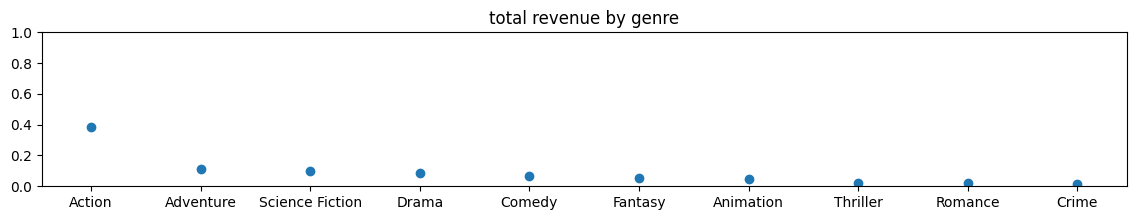

In [11]:
from item_lib import build_and_print
revenue_by_genre = build_and_print(recent_movies_df, cols = ['genre'], target = 'revenue', agg_name = 'total revenue')

Now from here, we also produce a scatter plot of budget versus revenue. 

<AxesSubplot: xlabel='budget', ylabel='revenue'>

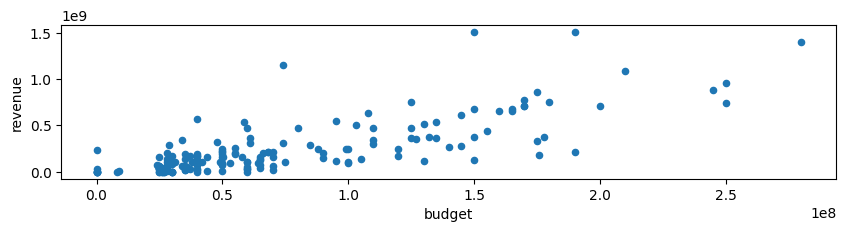

In [13]:
recent_movies_df.plot(kind = 'scatter', x = 'budget', y = 'revenue', figsize = (10, 2))

Notice with a numerical value like budget, we were able to plot our budget and revenue data directly.  We did not need to first aggregate and then plot the percentage of revenue like we did with genre movies.

So looking at the above, it appears that the higher the budget, the higher the revenue.  And we may want to separately distinguish our action movies from non action movies. 

We can do so by first adding a boolean column for `is_action`, and then use color, `c` to indicate color vs not. 

In [15]:
is_action = recent_movies_df.genre == 'Action'
recent_movies_is_action_df = recent_movies_df.assign(is_action = is_action)

In [21]:
recent_movies_is_action_df.sort_values('revenue', ascending = False)[:2]

,title,genre,budget,runtime,year,month,revenue,is_action
413,Jurassic World,Action,150000000,124.0,2015,6,1513528810,True
1589,Furious 7,Action,190000000,137.0,2015,4,1506249360,True


In [26]:
colors = {True:'blue', False:'orange'}

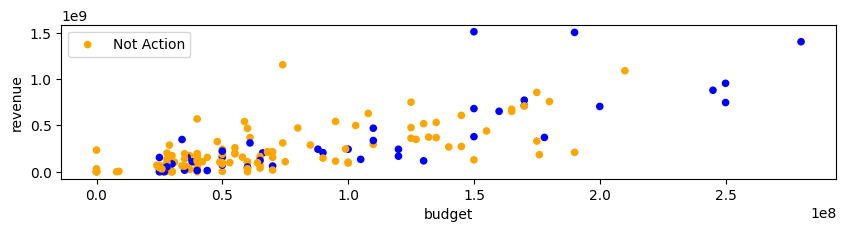

In [28]:
plt = recent_movies_is_action_df.plot(kind = 'scatter', x = 'budget', y = 'revenue',
                                c = is_action.map(colors), figsize = (10, 2), legend = True)

plt.legend(labels = ['Not Action', 'Action'])

So it appears that action movies to have a higher ceiling than our non-action movies, in terms of revenue.

But is it fair to say that producing an action movie *causes* an increase in revenue, or increasing the budget *causes* an increase in revenue?  The answer is no.

### Correlation

All we can do from the above so far is say that an increase in revenue is correlated or associated with an increase in revenue.

> **Correlation** There is a correlation between two variables $X$ and $Y$, when knowing the value of one gives you information about the value of another.

Provibg causation is much harder.

> An explanatory variable X has a causal link to Y when the value of X **effects** the value of Y.

Now oftentimes the first indication that there may be a causal link between two variables is through correlation.  But as we'll see there are many reasons that a variable may be *correlated* with an outcome, even without causal link to the outcome.

For example, let's look at a chart of education attainment and income.

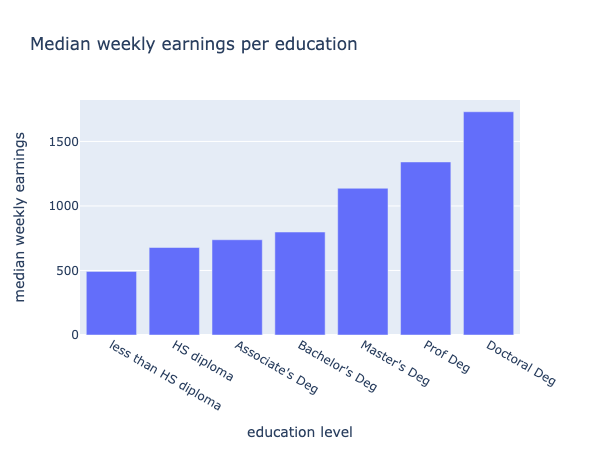

In [ ]:
import plotly.graph_objects as go
education_levels = ['less than HS diploma', 'HS diploma', "Associate's Deg", "Bachelor's Deg", "Master's Deg", "Prof Deg", "Doctoral Deg"]
earnings = [493, 678, 738, 798, 1137, 1341, 1730, 1623]
layout = {
    'yaxis': {'title': 'median weekly earnings'}, 'title': 'Median weekly earnings per education',
    'xaxis': {'title': 'education level'},
}
scatter = go.Bar(x = education_levels, y = earnings)
go.Figure(scatter, layout = layout)

Here, we can see that the amount of education [does correlate](https://www.bls.gov/careeroutlook/2018/data-on-display/education-pays.htm) with an individual's earnings.  That is, if we know the amount of an education an individual has, we change our expectation about how much that person earns.  

But we do not know if education *causes* a change in the amount of earnings that a person has.  

![](https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggTFJcbiAgRWR1Y2F0aW9uIC0uLSBJbmNvbWU7XG4iLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlfQ)

Because of this, we place a dotted line between the two, without an arrow.

#### 1. Correlation Because Causality

Now if there is causation, that is, if more education causes an increase in income, then we will generally see correlation.

$X \rightarrow Y$

* $Education$ $\rightarrow$  $Income$

This is consistent with the graph.  As someone learns more, the graph shows an increase in the amount of money.  It also follows a nice story.  As someone learns more, they gain skills which make them more valuable in the workplace.

####  2. Correlation From Reverse Causality

But the correlation between education and income could also be due to reverse causality.

**Reverse causality** is when our target effects our explanatory variable.  
$X \leftarrow Y$

For example, maybe as a person earns more income, they can afford to pay for more education.  So more income is causing more education.  Notice that if we infer X is causing Y, but really Y is causing X, then if we try to effect X, this will not have an impact on Y.

#### 3. Correlation from Confounding Variable

<img src="https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggTFJcbiAgVyAtLT4gWFxuICBXIC0tPiBZXG4iLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlfQ" width="15%">

Correlation can also occur when both X and Y are influenced by a common, often unknown cause.  For example, eating ice cream is strongly correlated with the number of drownings.  

But it would be wrong to say that ice cream consumption causes drownings. Instead, it's likely that when the temperature rises more people eat ice cream, and more people swim, which leads to a correlation between ice cream and drownings.

* $Temperature \rightarrow Ice\ Cream$
* $Temperature \rightarrow Drownings$

So with a confounding variable, there is an outside factor that is influencing both the explanatory variable and the outcome.  And this is causing the explanatory variable and the outcome to move together.

> A confounding variable is also known as a *lurking variable*, because it's hidden, in the background. 

#### 4. Bidirectional causation

With bi-directional causation X is influencing Y and Y is influencing X.  
* $X \rightarrow Y$
* $Y \rightarrow X$

Take a look at the chart below.

<img src="https://github.com/jigsawlabs-student/correlations-to-experiments/blob/master/poverty-food.png?raw=1" width="50%">

Here an increase in poverty leads to an increase in food stamps.  And maybe others would argue than an increase in food stamps leads to an increase in poverty.  

* $Poverty$  $\rightarrow$ $More$ $Food $ $Stamps$
*  $Poverty$  $\leftarrow$ $More$ $Food $ $Stamps$

> The $Poverty$  $\leftarrow$ $More$ $Food $ $Stamps$ explanation could be an example of *moral hazard*.  Moral hazard is the lack of incentive to guard against risk where one is protected from its consequences.

> The $Poverty$  $\leftarrow$ $More$ $Food $ $Stamps$ also could be an example of *adverse selection*.  With adverse selection, is when people more at risk are more likely to buy into the policy.  Here, buying in, could be moving to the region that offers protection.

#### 5. Coincidental Correlation

Sometimes there is a strong correlation purely by chance.

<img src="https://github.com/jigsawlabs-student/correlations-to-experiments/blob/master/chart.png?raw=1" width="80%">

### Summary

In this lesson we saw that just because there is correlation between two variables does not mean that we can infer that our explanatory variable is causing our outcome.  In other words:

* If we can show:
    * $X - - - Y$
* This does not mean X causes Y:
    * $X \rightarrow Y$

Really it could that there's:
1. Reverse Causality $X \leftarrow Y$

2. Confounding Variable <img src="https://mermaid.ink/img/eyJjb2RlIjoiZ3JhcGggTFJcbiAgVyAtLT4gWFxuICBXIC0tPiBZXG4iLCJtZXJtYWlkIjp7InRoZW1lIjoiZGVmYXVsdCJ9LCJ1cGRhdGVFZGl0b3IiOmZhbHNlfQ" width="10%">

3. Bi-directional causation $X \rightarrow Y$ and $Y \rightarrow X$

4.  Coincidental Correlation $X$, $Y$

So correlations between two variable are not very useful in explaining causation because there are many ways that we can have a correlation.

### Resources

[Steven Levitt -  Becker Brown Bag](https://www.youtube.com/watch?v=2EH1D3nhOGI&t=861s)

[Calling Bullshit Course](https://www.youtube.com/watch?v=YAAHJm1pi1E&list=PLPnZfvKID1Sje5jWxt-4CSZD7bUI4gSPS&index=12)

[Smoking and Lung Cancer statistics](http://www-dep.iarc.fr/WHOdb/Graph4p.asp?cancer%5B%5D=80&male=1&country%5B%5D=4220&country%5B%5D=2450&sYear=1950&eYear=2020&stat=3&age_from=1&age_to=18&orientation=1&window=1&grid=1&line=2&moving=1&scale=0&submit=%A0%A0%A0Execute%A0%A0%A0)

[Correlation vs Causation](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)